# Bias Variance tradeoff


Nous allons illustrer le principe de **compromis biais-variance** (*bias-variance tradeoff*) avec une régression polynomiale.

Le **biais** mesure à quel point les prédictions moyennes d'un modèle s'éloignent de la vraie fonction cible.
> erreur due au fait que le modèle est trop simple ou mal spécifié (sous-ajustement).


La **variance** mesure à quel point les prédictions d’un modèle changent lorsque l’on modifie légèrement les données d’entraînement.
> sensibilité du modèle aux fluctuations des données (sur-ajustement).

Mathématiquement :

Pour un point donné $x$, si $f(x)$ est la vraie fonction et $\hat{f}(x)$ la prédiction du modèle, alors :

$$
\text{Biais}^2(x) = \left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2
$$

La variance est définie par :

$$
\text{Var}(x) = \mathbb{E}\left[ (\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2 \right]
$$

L’erreur quadratique totale peut s’écrire comme :

$$
\mathbb{E}\left[(\hat{f}(x) - f(x))^2\right]
= \text{Biais}^2(x) + \text{Var}(x) + \sigma^2
$$

où $\sigma^2$ est la variance du bruit dans les données.




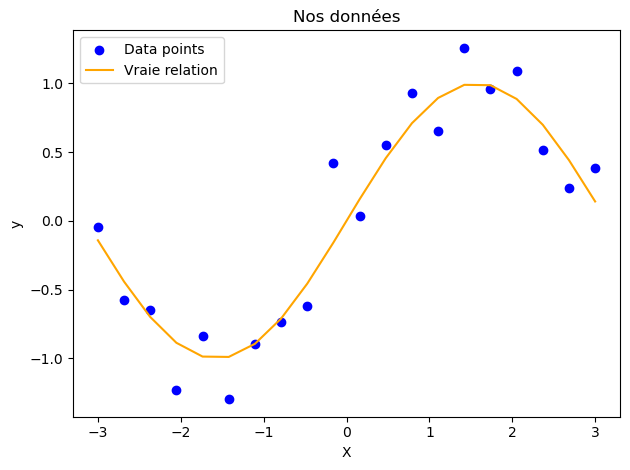

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

n_data_points = 20
X = np.linspace(-3, 3, n_data_points)
np.random.seed(12)
noise = np.random.normal(0, 0.2, n_data_points)
y = np.sin(X) + noise


plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, np.sin(X), color="orange", label="Vraie relation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Nos données")
plt.tight_layout()

## Vue schématique

Un modèle très simple aura peu de variance (globalement la ligne verte reste la même : les prédictions diffèrent peu selon le jeu de données) mais un gros biais (les prédictions sont loin de la réalité, les points bleus de la ligne verte) : c'est un signe d'**underfitting**.

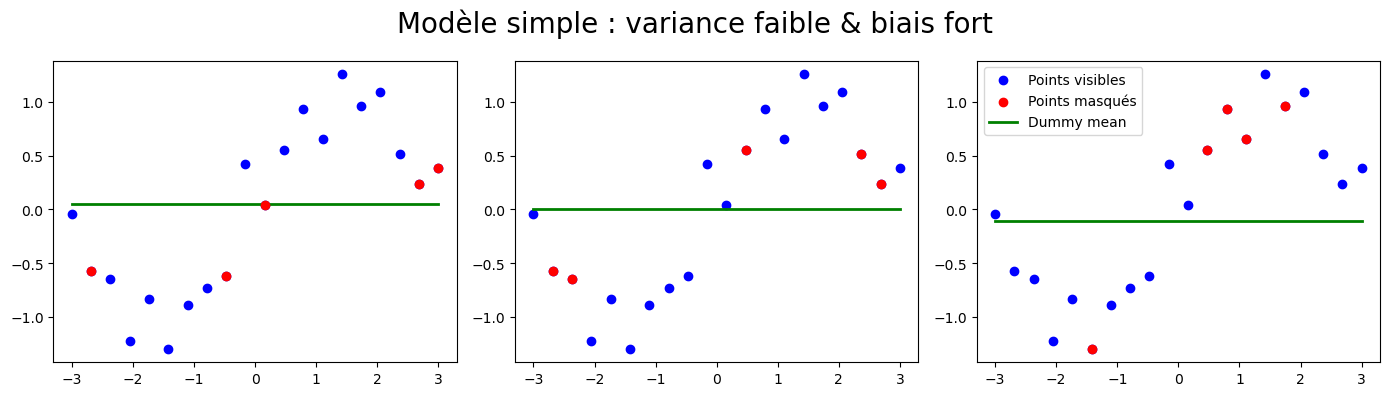

In [3]:
from sklearn.dummy import DummyRegressor
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

np.random.seed(0)

for ax in axes:
    # masque : True = on garde, False = on masque
    mask = np.ones(len(X), dtype=bool)

    # on enlève exactement 5 points
    masked_idx = np.random.choice(len(X), 5, replace=False)
    mask[masked_idx] = False

    # données utilisées pour l'entraînement
    X_train = X[mask].reshape(-1, 1)
    y_train = y[mask]

    # DummyRegressor
    model = DummyRegressor(strategy="mean")
    model.fit(X_train, y_train)
    y_pred = model.predict(X.reshape(-1, 1))

    # affichage
    ax.scatter(X, y, color="blue", label="Points visibles")
    ax.scatter(X[~mask], y[~mask], color="red", label="Points masqués", zorder=5)
    ax.plot(X, y_pred, color="green", lw=2, label="Dummy mean")

plt.suptitle("Modèle simple : variance faible & biais fort", fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


Un modèle plus complexe aura un biais très faible (les prédictions du modèle sont très proches des valeurs d'entraînement : les points bleus et laligne verte sont proches) mais plus de variance (la forme de la ligne verte varie beaucoup avec une petite variation des données d'entraînement) : c'est un signe d'**overfitting**.

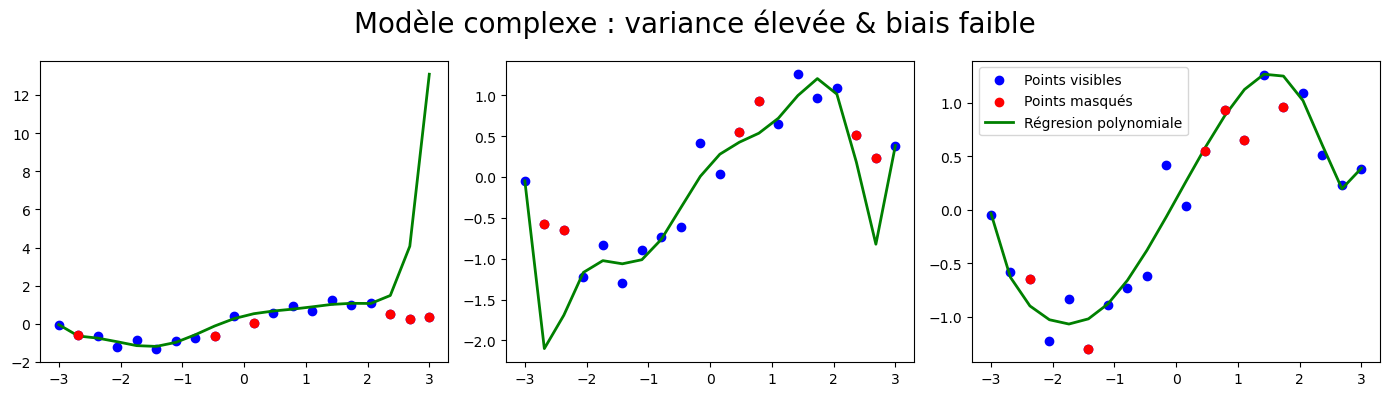

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 8
poly = PolynomialFeatures(degree=degree)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

np.random.seed(0)

for ax in axes:
    # masque : True = on garde, False = on masque
    mask = np.ones(len(X), dtype=bool)

    # on enlève exactement 5 points
    masked_idx = np.random.choice(len(X), 6, replace=False)
    mask[masked_idx] = False

    # données utilisées pour l'entraînement
    X_train = X[mask].reshape(-1, 1)
    y_train = y[mask]

    # transformation polynomiale
    X_poly = poly.fit_transform(X_train)
    X_all_poly = poly.transform(X.reshape(-1, 1))

    # modèle polynomial
    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_pred = model.predict(X_all_poly)

    # affichage
    ax.scatter(X, y, color="blue", label="Points visibles")
    ax.scatter(X[~mask], y[~mask], color="red", label="Points masqués", zorder=5)
    ax.plot(X, y_pred, color="green", lw=2, label="Régresion polynomiale")

plt.suptitle("Modèle complexe : variance élevée & biais faible", fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


## A la quête du juste milieu ...


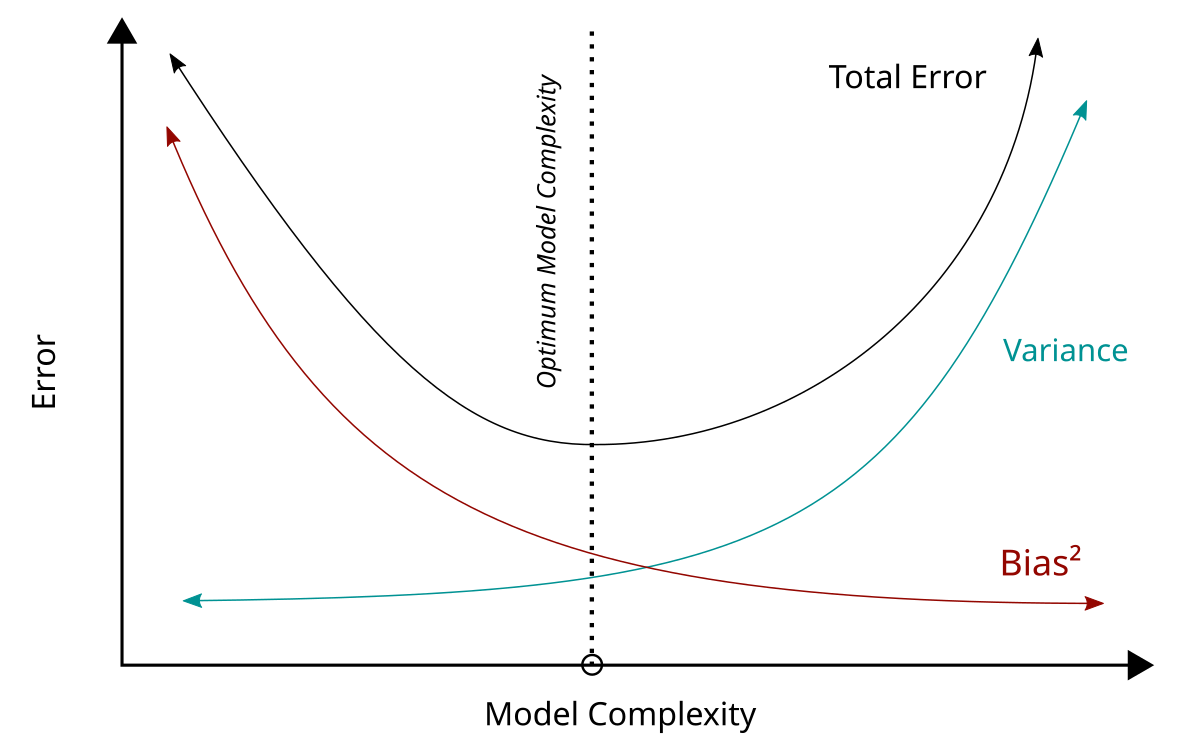


source : Wikipedia

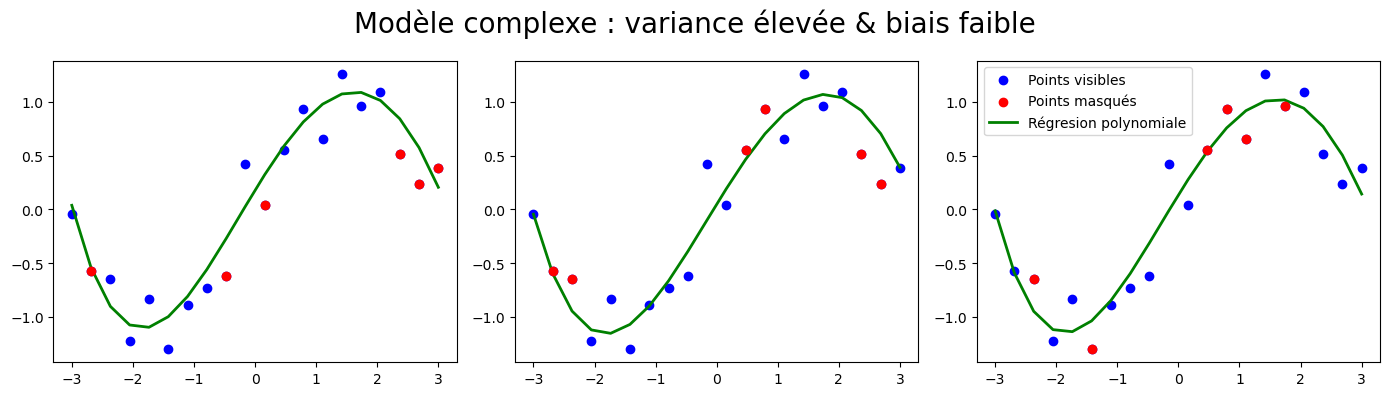

In [5]:

degree = 4
poly = PolynomialFeatures(degree=degree)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

np.random.seed(0)

for ax in axes:
    # masque : True = on garde, False = on masque
    mask = np.ones(len(X), dtype=bool)

    # on enlève exactement 5 points
    masked_idx = np.random.choice(len(X), 6, replace=False)
    mask[masked_idx] = False

    # données utilisées pour l'entraînement
    X_train = X[mask].reshape(-1, 1)
    y_train = y[mask]

    # transformation polynomiale
    X_poly = poly.fit_transform(X_train)
    X_all_poly = poly.transform(X.reshape(-1, 1))

    # modèle polynomial
    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_pred = model.predict(X_all_poly)

    # affichage
    ax.scatter(X, y, color="blue", label="Points visibles")
    ax.scatter(X[~mask], y[~mask], color="red", label="Points masqués", zorder=5)
    ax.plot(X, y_pred, color="green", lw=2, label="Régresion polynomiale")

plt.suptitle("Modèle complexe : variance élevée & biais faible", fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()
